<table style="width:100%;">
  <tr>
    <td style="text-align:left; vertical-align:top;">
      <img src="https://github.com/niaggar/qiskit-fall-fest-25-univalle/blob/main/public/images/Badge_Dark.svg?raw=true" width="100" height="100">
    </td>
    <td style="text-align:right; vertical-align:top;">
      <img src="https://github.com/niaggar/qiskit-fall-fest-25-univalle/blob/main/public/images/facultad.jpeg?raw=true" height="100">
    </td>
    <td style="text-align:right; vertical-align:top;">
      <img src="https://github.com/niaggar/qiskit-fall-fest-25-univalle/blob/main/public/images/kipuLogo.jpeg?raw=true" height="100">
    </td>
  </tr>
</table>

# Taller rápido de Qiskit

En este notebook veremos, de forma muy práctica:

1. Repaso muy breve de qué es un qubit.
2. Rotaciones de un qubit y la esfera de Bloch.
3. Compuertas básicas de 1 qubit (X, Y, Z, H, S, T, RX, RY, RZ).
4. Compuertas de 2 qubits (CNOT, CZ) y noción de entrelazamiento.
5. Simulación de circuitos cuánticos con Qiskit.
6. Construcción y medición de los estados de Bell.

La idea es que cada sección tenga:
- Explicación corta en español.
- Código para que el/la estudiante ejecute y experimente.
- (Opcional) pequeños ejercicios marcados como **Ejercicio**.


## 0. Instalación e importación de Qiskit

Si estás en un entorno donde Qiskit no está instalado, descomenta y ejecuta la siguiente celda.

In [ ]:
# Si lo necesitas, descomenta:
!pip install qiskit qiskit-aer
!pip install matplotlib
!pip install pylatexenc
!pip install planqk-quantum

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_vector, plot_histogram
import numpy as np
from math import pi

## 1. El qubit y el estado inicial

Un qubit es un sistema cuántico de 2 niveles. Su estado general puede escribirse como
$$\vert \psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle,$$
donde $\alpha, \beta \in \mathbb{C}$ y $|\alpha|^2 + |\beta|^2 = 1$.

En Qiskit, un circuito de un qubit comienza por defecto en el estado $\vert 0 \rangle$.


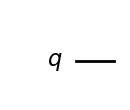

In [ ]:
# Circuito de 1 qubit vacío
qc = QuantumCircuit(1)
qc.draw('mpl')

In [ ]:
# Obtenemos el statevector del circuito (sin compuertas, aún en |0>)
psi = Statevector(qc)
psi

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


Observa que el estado es $[1, 0]$, que corresponde a $\vert 0 \rangle$.

### Esfera de Bloch (idea rápida)
Cualquier estado puro de un qubit se puede representar como un punto en la esfera de Bloch, con coordenadas $(x,y,z)$ dadas por los valores de expectación de las matrices de Pauli.


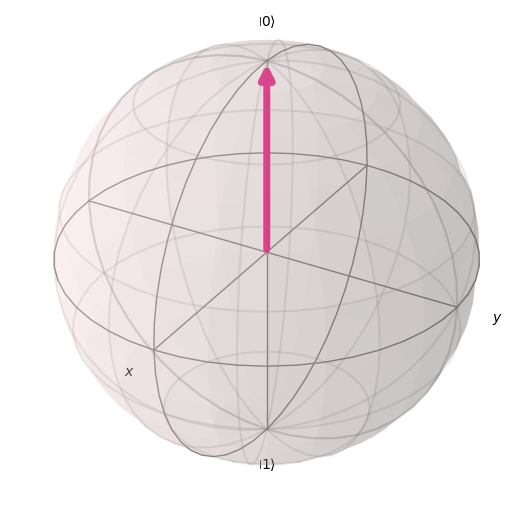

In [ ]:
bloch = psi.data  # amplitudes complejas

# Función de ayuda para convertir statevector a coordenadas de Bloch
def statevector_to_bloch(state):
    # state es un vector [a, b]
    a, b = state[0], state[1]
    # Coeficientes complejos
    # x = 2 Re(a* b)
    # y = 2 Im(a* b)
    # z = |a|^2 - |b|^2
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

bloch_coords = statevector_to_bloch(psi.data)
plot_bloch_vector(bloch_coords)

## --------

## 2. Rotaciones de un qubit

En Qiskit existen compuertas de rotación alrededor de los ejes X, Y y Z de la esfera de Bloch:
- `rx(theta)`
- `ry(theta)`
- `rz(theta)`

Estas compuertas aplican las rotaciones:
$$ R_x(\theta), R_y(\theta), R_z(\theta). $$

Probemos una rotación alrededor del eje Y con ángulo $\pi/2$ para llevar $\vert 0 \rangle$ a un estado de superposición.


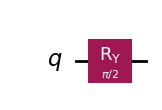

In [ ]:
qc_ry = QuantumCircuit(1)
qc_ry.ry(pi/2, 0)
qc_ry.draw('mpl')

Statevector: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


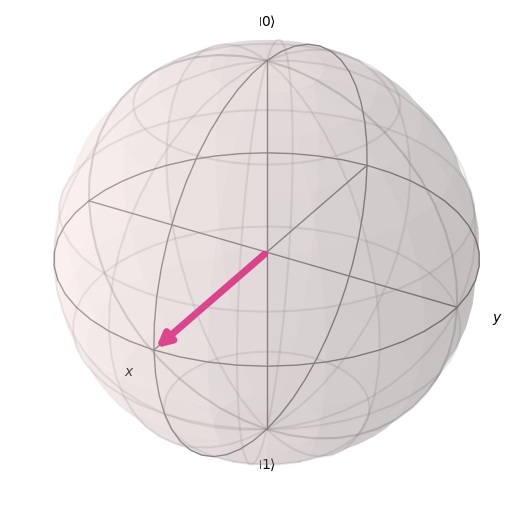

In [ ]:
psi_ry = Statevector(qc_ry)
print("Statevector:", psi_ry)
bloch_coords_ry = statevector_to_bloch(psi_ry.data)
plot_bloch_vector(bloch_coords_ry)

**Ejercicio 1:**

1. Cambia el ángulo en `ry(theta)` y observa cómo cambia el punto en la esfera de Bloch.
2. Prueba con `rx` y `rz`. ¿Qué efecto notas visualmente en la esfera?


## --------

## 3. Compuertas básicas de un qubit

Algunas compuertas fundamentales:

- **X**: Pauli-X ("NOT" cuántico), invierte $\vert 0 \rangle \leftrightarrow \vert 1 \rangle$.
- **Y**: Pauli-Y.
- **Z**: Pauli-Z (cambia el signo de $\vert 1 \rangle$).
- **H**: Hadamard, crea una superposición equilibrada.
- **S, T**: Compuertas de fase.

Vamos a ver cómo cambian el statevector y la representación en Bloch.


====== Compuerta X ======


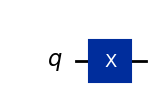

Statevector después de x: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


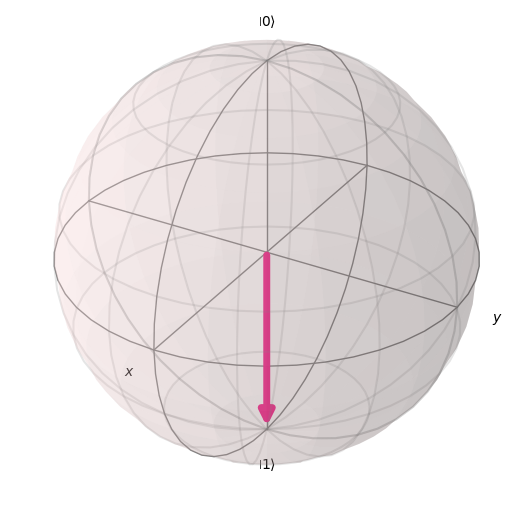

====== Compuerta Y ======


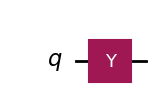

Statevector después de y: Statevector([0.+0.j, 0.+1.j],
            dims=(2,))


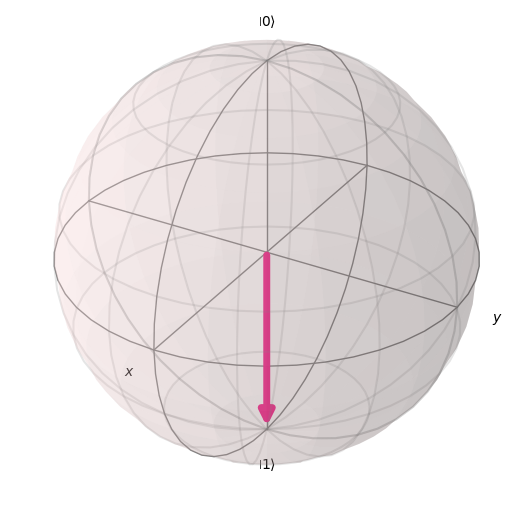

====== Compuerta Z ======


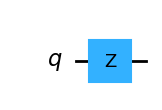

Statevector después de z: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


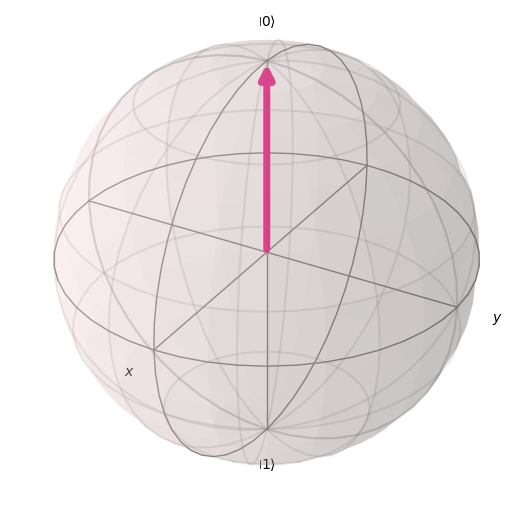

====== Compuerta H ======


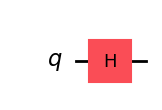

Statevector después de h: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


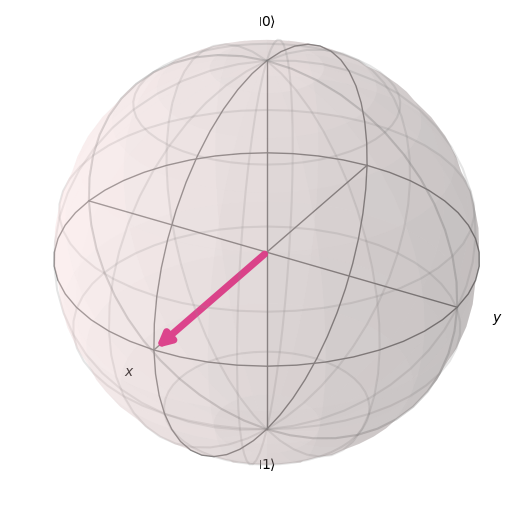

====== Compuerta S ======


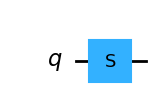

Statevector después de s: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


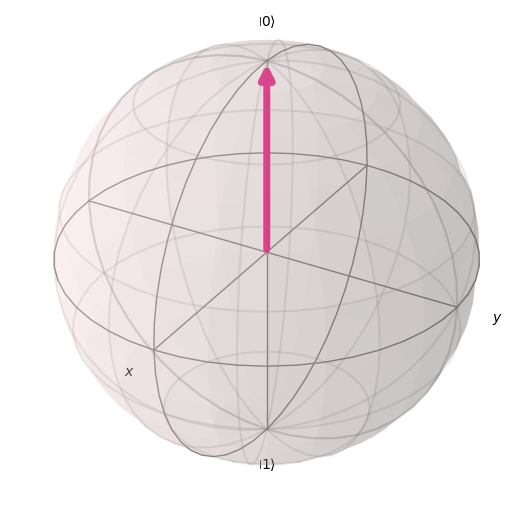

====== Compuerta T ======


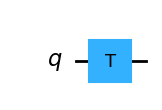

Statevector después de t: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


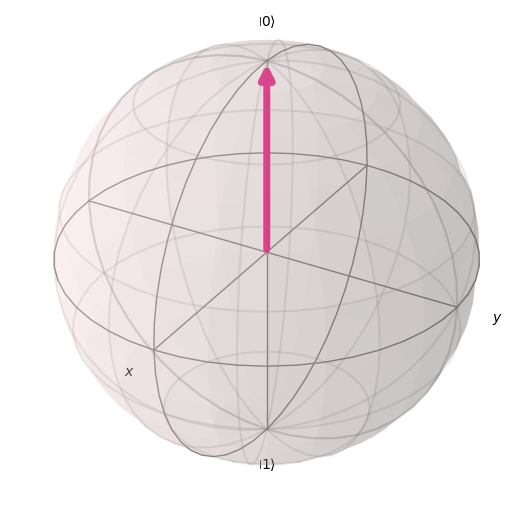

In [ ]:
def show_single_qubit_gate(gate_name):
    qc = QuantumCircuit(1)
    getattr(qc, gate_name)(0)  # aplica la compuerta al qubit 0
    display(qc.draw('mpl'))
    psi = Statevector.from_instruction(qc)
    print(f"Statevector después de {gate_name}:", psi)
    bloch_coords = statevector_to_bloch(psi.data)
    display(plot_bloch_vector(bloch_coords))

for gate in ["x", "y", "z", "h", "s", "t"]:
    print("====== Compuerta", gate.upper(), "======")
    show_single_qubit_gate(gate)


**Ejercicio 2:**

1. Quita el bucle `for` y estudia una sola compuerta a la vez.
2. Encadena varias compuertas (por ejemplo H seguido de Z, o X seguido de H) y mira el resultado en la esfera de Bloch.


## --------

## 4. Medición y simulación con `AerSimulator`

Hasta ahora hemos visto el *statevector* (estado puro). Para simular medidas, usamos un simulador y añadimos compuertas de medición.

Pasos típicos:
1. Crear circuito.
2. Añadir compuertas.
3. Añadir medición(es).
4. Ejecutar en `AerSimulator`.
5. Ver el histograma de resultados.


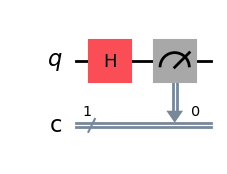

In [ ]:
sim = AerSimulator()

# Circuito: aplicar H a |0> y medir
qc_meas = QuantumCircuit(1, 1)
qc_meas.h(0)
qc_meas.measure(0, 0)
qc_meas.draw('mpl')

{'0': 476, '1': 524}


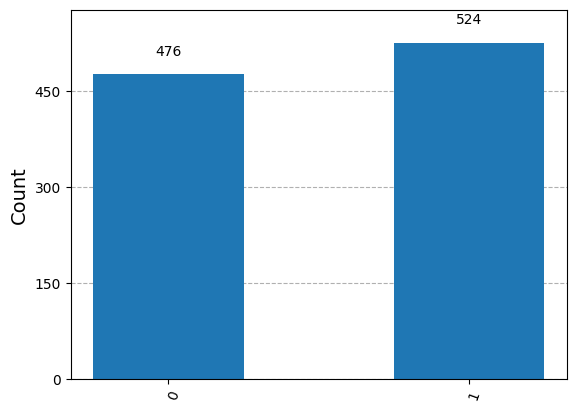

In [ ]:
job = sim.run(qc_meas, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Como el estado ideal es $\frac{1}{\sqrt{2}} (\vert 0 \rangle + \vert 1 \rangle)$, esperamos aproximadamente 50% de 0 y 50% de 1.

**Ejercicio 3:**

1. Quita la compuerta H y verifica que ahora siempre obtienes 0.
2. Prueba con la compuerta X antes de medir. ¿Qué obtienes?


## 5. Compuertas de dos qubits

Las compuertas más importantes entre dos qubits son las controladas, especialmente **CNOT** (también llamada CX en Qiskit).

- `cx(control, target)` aplica X al qubit *target* solo si el qubit *control* está en 1.

Veamos un ejemplo sencillo sin entrelazamiento primero.


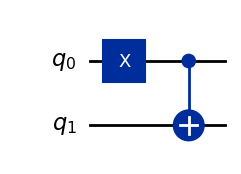

In [ ]:
qc_2 = QuantumCircuit(2)
qc_2.x(0)      # ponemos el qubit 0 en |1>
qc_2.cx(0, 1)  # CNOT con control=0, target=1
qc_2.draw('mpl')

In [ ]:
psi_2 = Statevector(qc_2)
psi_2

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


Aquí el estado final es $\vert 11 \rangle$, un estado *producto* (no entrelazado).

## 6. Estados de Bell

Los **estados de Bell** son cuatro estados maximamente entrelazados de dos qubits:

- $\vert \Phi^+ \rangle = \frac{1}{\sqrt{2}}(\vert 00 \rangle + \vert 11 \rangle)$
- $\vert \Phi^- \rangle = \frac{1}{\sqrt{2}}(\vert 00 \rangle - \vert 11 \rangle)$
- $\vert \Psi^+ \rangle = \frac{1}{\sqrt{2}}(\vert 01 \rangle + \vert 10 \rangle)$
- $\vert \Psi^- \rangle = \frac{1}{\sqrt{2}}(\vert 01 \rangle - \vert 10 \rangle)$

La forma más común de preparar $\vert \Phi^+ \rangle$ es:
1. Empezar en $\vert 00 \rangle$.
2. Aplicar H al primer qubit.
3. Aplicar CNOT con control en el primer qubit y target en el segundo.


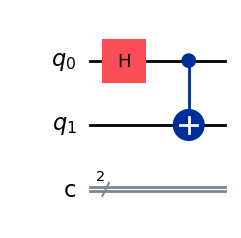

In [ ]:
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)
qc_bell.cx(0, 1)
qc_bell.draw('mpl')

In [ ]:
psi_bell = Statevector(qc_bell.remove_final_measurements(inplace=False))
psi_bell

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


Deberías ver el statevector proporcional a `[1/√2, 0, 0, 1/√2]`, que corresponde a $\vert \Phi^+ \rangle$.

Ahora midamos para ver las correlaciones.


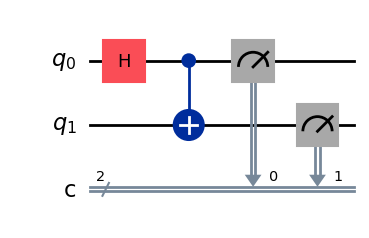

In [ ]:
# Añadimos medición a ambos qubits
qc_bell_meas = QuantumCircuit(2, 2)
qc_bell_meas.h(0)
qc_bell_meas.cx(0, 1)
qc_bell_meas.measure([0, 1], [0, 1])
qc_bell_meas.draw('mpl')

{'00': 492, '11': 508}


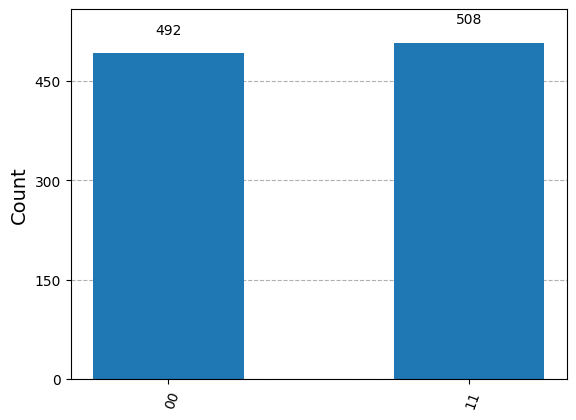

In [ ]:
job_bell = sim.run(qc_bell_meas, shots=1000)
result_bell = job_bell.result()
counts_bell = result_bell.get_counts()
print(counts_bell)
plot_histogram(counts_bell)

**Ejercicio 5 (para discusión):**

1. ¿Por qué decimos que estos estados están entrelazados? Intenta argumentar por qué no se pueden escribir como producto de dos estados de un qubit.
2. Mide los qubits en diferentes bases (por ejemplo, aplicando H antes de medir) y observa cómo cambian las correlaciones.


## --------
## Plataformas (premio)

In [ ]:
from planqk.quantum.sdk import PlanqkQuantumProvider
provider = PlanqkQuantumProvider("my-token-here")

In [ ]:
# List all available quantum backends
backends = provider.backends()
print(backends)

# Select a certain backend
backend = provider.get_backend("azure.ionq.simulator")

In [ ]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure(range(2), range(2))

job = backend.run(circuit, shots=100)

In [ ]:
# Monitor job status and get results
print(f"Status: {job.status()}")

In [ ]:
job.result().get_counts()